In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
train = pd.read_csv('C:/data/의류/train.csv', index_col = 'index')
test = pd.read_csv('C:/data/의류/test.csv', index_col = 'index')
submission = pd.read_csv('C:/data/의류/sample_submission.csv', index_col = 'index')

In [9]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
index,,,,,,,,,,,,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
submission.head()

,label
index,
0,0
1,0
2,0
3,0
4,0


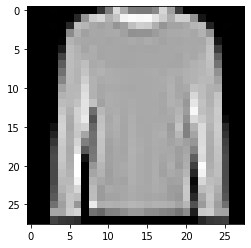

In [12]:
img = np.array(train.iloc[81,1:],dtype = 'float32').reshape((28,28))
plt.imshow(img, cmap = 'gray')
plt.show()

In [18]:
pip install keras==2.0.0

  Created wheel for keras: filename=Keras-2.0.0-py3-none-any.whl size=227989 sha256=6743e533c3096a18ef3b438071a107bd1f0dbf1ae7710358b3dc7b7e5689304e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\36\1a\f7\d34a44e2fa0c03377e24bae68eacaeb12ea66fb3d297612612
Successfully built keras
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [21]:
train_df = pd.read_csv('C:/data/의류/train.csv')
test_df = pd.read_csv('C:/data/의류/test.csv')

In [22]:
train_data = np.array(train_df.iloc[:,1:], dtype = 'float32')
test_data = np.array(test_df.iloc[:,1:], dtype='float32')

In [23]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test= test_data/255

In [24]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [25]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_validate = x_validate.reshape(x_validate.shape[0],28,28,1)

In [27]:
def set_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(5000, activation='relu'),
        tf.keras.layers.Dense(5000, activation='relu'),
        tf.keras.layers.Dense(5000, activation='relu'),
        tf.keras.layers.Dense(5000, activation='relu'),
        tf.keras.layers.Dense(5000, activation='relu'),
        tf.keras.layers.Dense(5000, activation='relu'),
        tf.keras.layers.Dense(5000, activation='relu'),
        tf.keras.layers.Dense(5000, activation='relu'),
        tf.keras.layers.Dense(5000, activation='relu'),
        tf.keras.layers.Dense(5000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(tf.keras.optimizers.Adam(lr=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model
    

In [29]:
pip install tensorflow==1.4

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.4 (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0)
ERROR: No matching distribution found for tensorflow==1.4
